The tutorial is from the scipy cookbook  
http://wiki.scipy.org/Cookbook/LoktaVolterraTutorial?action=show&redirect=LoktaVolterraTutorial

# Lokta Volterra Model

Lokta-Volterra model is also known as the predator-prey equations, describing the dynamics of biological systems in which two species interact, one a predator and the other its prey. The model was proposed independently by Alfred J. Lotka in 1925 and Bito Volterra in 1926.  

$\frac{du}{dt} = a*u - b*u*v$  
$\frac{dv}{dt} = -c*v + d*b*u*v$  

# Solve the Model

In [1]:
from numpy import *
import pylab as p
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

Integration using scipy.integrate.odeint

In [3]:
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

Depict the population of rabbits and foxes as the functions of time.

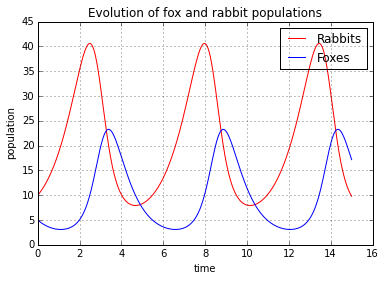

In [4]:
rabbits, foxes = X.T

f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
#f1.savefig('rabbits_and_foxes_1.png')

# Plotting direction fields and trajectories in the phase plane

In [12]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

# two fixed points
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])

(0, 40.0)

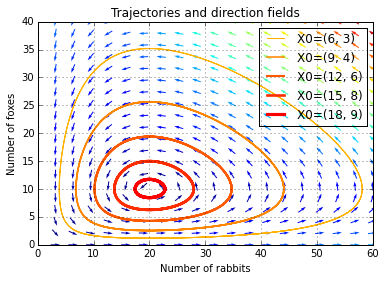

In [15]:
f2 = p.figure() 
#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % (X0[0], X0[1]) )

# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M 

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
# f2.savefig('rabbits_and_foxes_2.png')